<a id=top-page></a>
# `pykitPIV` demo: Transform images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cmcrameri.cm as cmc
from pykitPIV import Image
from pykitPIV import Postprocess, FlowField

In [2]:
figsize=(6,3)

In [3]:
image = Image(random_seed=100)

In [78]:
flowfield = FlowField(1,
                      size=(200,200),
                      size_buffer=10,
                      random_seed=100)

In [79]:
flowfield.generate_checkered_velocity_field(displacement=(0,2),
                                            m=4,
                                            n=4,
                                            rotation=None)

In [80]:
image.add_flowfield(flowfield)

Velocity field added to the image.


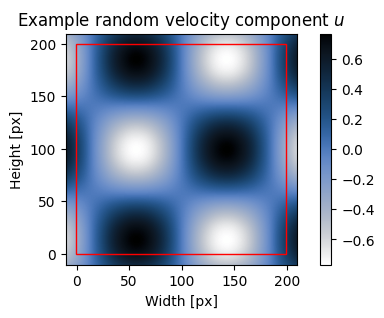

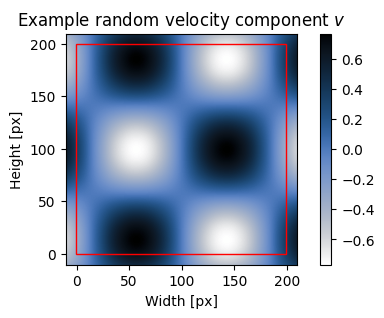

In [81]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=figsize);

***

## Handle user-created dataset

In [ ]:
n_points_h = 120
n_points_w = 220

In [ ]:
h = np.linspace(-1, 1, n_points_h)
w = np.linspace(-1, 1, n_points_w)

In [ ]:
m = 10
n = 10
r = 10

In [ ]:
(grid_w, grid_h) = np.meshgrid(w, h)

poly = np.sin(m*grid_w) * np.cos(n*grid_h) * np.sin(r*(grid_w + grid_h))

In [ ]:
plt.imshow(poly, origin='lower')

In [ ]:
postprocess = Postprocess(images_tensor)
log_transformed_images_tensor = postprocess.log_transform_images(addition=10)
postprocess.plot(False,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=(10,3));

In [ ]:
postprocess.plot(True,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=(10,3));

<a id=upload></a>
***

## Upload the saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [ ]:
image = Image()

In [ ]:
images_tensor_dic = image.upload_from_h5(filename='pykitPIV-tutorial-PIV-pairs.h5')
images_tensor = images_tensor_dic['I']
images_tensor = images_tensor[:,:,:,:]
images_tensor.shape

In [ ]:
postprocess = Postprocess(images_tensor)

In [ ]:
postprocess.image_pair

In [ ]:
log_transformed_images_tensor = postprocess.log_transform_images(addition=10000)

In [ ]:
log_transformed_images_tensor.shape

In [ ]:
postprocess.processed_image_tensor.shape

In [ ]:
postprocess.plot(1,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

In [ ]:
postprocess.plot(1,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

In [ ]:
def chebyshev_polynomial(h, w, order):

    (grid_w, grid_h) = np.meshgrid(w, h)

    Un_h = np.zeros((len(h), 1))
    Un_w = np.zeros((1, len(w)))
    sin_product = np.sin(order * (grid_w + grid_h))

    for i in range(0,len(h)):

        product = 1
        for k in range(0, order):
            product *= (h[i] - np.cos((k * np.pi)) / (order + 1))

        Un_h[i,0] = 2**order * product

    for i in range(0,len(w)):

        product = 1
        for k in range(0, order):
            product *= (w[i] - np.cos((k * np.pi)) / (order + 1))
            
        Un_w[0,i] = 2**order * product

    return np.dot(Un_h, Un_w) #* sin_product

In [ ]:
poly = chebyshev_polynomial(h, w, order=5)

In [ ]:
plt.imshow(poly, origin='lower')

***